# Artist Color Signature Analysis

This notebook demonstrates how to identify and compare the unique "color signatures" of different artists. You'll learn:

- How to extract dominant color palettes from an artist's body of work
- Statistical analysis of color usage patterns
- Comparison of color signatures across artists and movements
- Data visualization techniques for color data

## Learning Objectives

By the end of this notebook, you will understand:
1. How to use k-means clustering to find dominant colors
2. Statistical measures for color analysis (diversity, temperature, saturation)
3. How to compare and visualize color data across multiple artists
4. The relationship between artistic style and color choices

## Setup

First, let's import the necessary libraries:

In [1]:
from renoir import ArtistAnalyzer, ColorExtractor, ColorAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from collections import Counter

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## Part 1: Extracting an Artist's Color Signature

Let's start by analyzing Pierre-Auguste Renoir's color palette. We'll extract a sample of his works and analyze their dominant colors.

In [2]:
# Initialize analyzers
artist_analyzer = ArtistAnalyzer()
color_extractor = ColorExtractor()
color_analyzer = ColorAnalyzer()

# Extract Renoir's works
print("Loading Renoir's artworks...")
renoir_works = artist_analyzer.extract_artist_works('pierre-auguste-renoir', limit=20)
print(f"✓ Loaded {len(renoir_works)} artworks")

Loading Renoir's artworks...
Loading WikiArt dataset...


Resolving data files:   0%|          | 0/72 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/45 [00:00<?, ?it/s]

✓ Loaded 81444 artworks
✓ Found 20 works by pierre-auguste-renoir
✓ Loaded 20 artworks


### Extract Dominant Colors

Now we'll extract the dominant colors from each artwork using k-means clustering:

In [5]:
# Extract dominant colors from each artwork
all_colors = []

for i, work in enumerate(renoir_works[:5]):  # Analyze first 5 works
    image = work['image']
    
    # Extract 5 dominant colors from this artwork
    palette = color_extractor.extract_dominant_colors(image, n_colors=5)
    
    # Store colors with metadata
    for color in palette:
        all_colors.append({
            'rgb': color,
            'hex': color_extractor.rgb_to_hex(color),
            'artwork_index': i
        })
    
    print(f"Artwork {i+1}: Extracted {len(palette)} colors")

print(f"\nTotal colors extracted: {len(all_colors)}")

Artwork 1: Extracted 5 colors
Artwork 2: Extracted 5 colors
Artwork 3: Extracted 5 colors
Artwork 4: Extracted 5 colors
Artwork 5: Extracted 5 colors

Total colors extracted: 25


### Visualize the Color Palette

Let's create a visualization of Renoir's color signature:

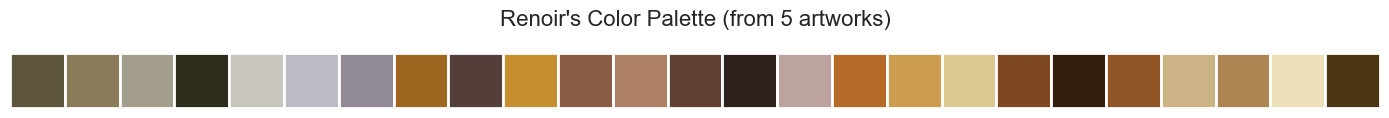

In [6]:
# Prepare data for visualization
colors_rgb = [c['rgb'] for c in all_colors]
colors_hex = [c['hex'] for c in all_colors]

# Create a horizontal bar showing all extracted colors
fig, ax = plt.subplots(figsize=(14, 2))

# Convert RGB tuples to format matplotlib expects (0-1 range)
colors_normalized = [(r/255, g/255, b/255) for r, g, b in colors_rgb]

# Create color swatches
for i, color in enumerate(colors_normalized):
    ax.add_patch(plt.Rectangle((i, 0), 1, 1, facecolor=color, edgecolor='white', linewidth=2))

ax.set_xlim(0, len(colors_normalized))
ax.set_ylim(0, 1)
ax.set_aspect('equal')
ax.axis('off')
ax.set_title("Renoir's Color Palette (from 5 artworks)", fontsize=16, pad=20)

plt.tight_layout()
plt.show()

## Part 2: Statistical Analysis of Color Usage

Now let's analyze the statistical properties of Renoir's color palette:

In [7]:
# Analyze color statistics
stats = color_analyzer.analyze_palette_statistics(colors_rgb)

print("=" * 60)
print("Renoir's Color Statistics")
print("=" * 60)
print(f"Average RGB: {stats['mean_rgb']}")
print(f"Average Hue: {stats['mean_hue']:.1f}°")
print(f"Average Saturation: {stats['mean_saturation']:.1f}%")
print(f"Average Value/Brightness: {stats['mean_value']:.1f}%")
print(f"\nColor Diversity Score: {color_analyzer.calculate_color_diversity(colors_rgb):.2f}")
print(f"Saturation Score: {color_analyzer.calculate_saturation_score(colors_rgb):.2f}")
print(f"Brightness Score: {color_analyzer.calculate_brightness_score(colors_rgb):.2f}")

Renoir's Color Statistics
Average RGB: (np.int64(146), np.int64(118), np.int64(86))
Average Hue: 28.1°
Average Saturation: 44.4%
Average Value/Brightness: 57.8%

Color Diversity Score: 0.39
Saturation Score: 44.39
Brightness Score: 57.79


### Color Temperature Analysis

Let's analyze the warm/cool balance in Renoir's palette:

KeyError: 'warm_count'

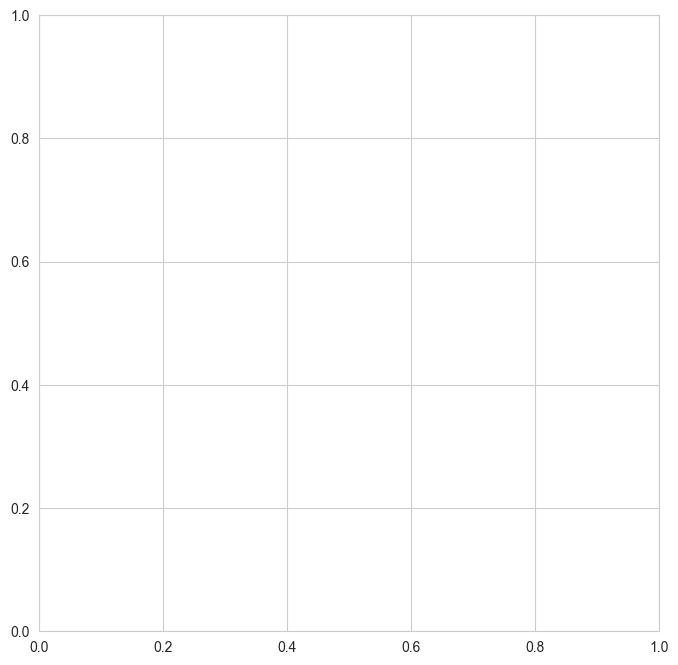

In [8]:
# Analyze color temperature distribution
temp_dist = color_analyzer.analyze_color_temperature_distribution(colors_rgb)

# Create pie chart
fig, ax = plt.subplots(figsize=(8, 8))
colors_map = {'warm': '#ff6b6b', 'cool': '#4ecdc4', 'neutral': '#95a5a6'}
pie_colors = [colors_map[temp] for temp in temp_dist.keys()]

wedges, texts, autotexts = ax.pie(
    temp_dist.values(), 
    labels=temp_dist.keys(),
    autopct='%1.1f%%',
    colors=pie_colors,
    startangle=90,
    textprops={'fontsize': 14}
)

# Make percentage text bold
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

ax.set_title("Renoir's Color Temperature Distribution", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

print(f"Dominant temperature: {max(temp_dist, key=temp_dist.get)}")

## Part 3: Comparing Multiple Artists

Now let's compare color signatures across different artists from the Impressionist movement:

In [ ]:
# Artists to compare
artists = [
    ('pierre-auguste-renoir', 'Renoir'),
    ('claude-monet', 'Monet'),
    ('edgar-degas', 'Degas')
]

# Function to extract artist's color signature
def get_artist_signature(artist_id, n_works=10):
    works = artist_analyzer.extract_artist_works(artist_id, limit=n_works)
    colors = []
    
    for work in works:
        palette = color_extractor.extract_dominant_colors(work['image'], n_colors=5)
        colors.extend(palette)
    
    return colors

# Extract signatures for all artists
print("Extracting color signatures...\n")
artist_signatures = {}

for artist_id, artist_name in artists:
    print(f"Analyzing {artist_name}...")
    colors = get_artist_signature(artist_id, n_works=10)
    artist_signatures[artist_name] = colors
    print(f"  ✓ Extracted {len(colors)} colors")

print("\nAnalysis complete!")

### Compare Statistical Properties

Let's create a comparison table of color statistics:

In [ ]:
# Create comparison DataFrame
comparison_data = []

for artist_name, colors in artist_signatures.items():
    stats = color_analyzer.analyze_palette_statistics(colors)
    
    comparison_data.append({
        'Artist': artist_name,
        'Avg Hue (°)': f"{stats['mean_hue']:.1f}",
        'Avg Saturation (%)': f"{stats['mean_saturation']:.1f}",
        'Avg Brightness (%)': f"{stats['mean_value']:.1f}",
        'Color Diversity': f"{color_analyzer.calculate_color_diversity(colors):.2f}",
        'Saturation Score': f"{color_analyzer.calculate_saturation_score(colors):.2f}",
        'Brightness Score': f"{color_analyzer.calculate_brightness_score(colors):.2f}"
    })

df = pd.DataFrame(comparison_data)
df = df.set_index('Artist')

print("\n" + "=" * 80)
print("Impressionist Artists - Color Statistics Comparison")
print("=" * 80)
print(df.to_string())
print("\n")

### Visualize Temperature Comparison

Let's create a grouped bar chart comparing color temperature preferences:

In [ ]:
# Analyze temperature for each artist
temp_comparison = {}

for artist_name, colors in artist_signatures.items():
    temp_dist = color_analyzer.analyze_color_temperature_distribution(colors)
    temp_comparison[artist_name] = temp_dist

# Create DataFrame for plotting
temp_df = pd.DataFrame(temp_comparison).T.fillna(0)

# Create grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))
temp_df.plot(kind='bar', ax=ax, color=['#ff6b6b', '#4ecdc4', '#95a5a6'])

ax.set_title('Color Temperature Comparison Across Artists', fontsize=16, pad=20)
ax.set_xlabel('Artist', fontsize=12)
ax.set_ylabel('Number of Colors', fontsize=12)
ax.legend(title='Temperature', fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## Part 4: Advanced Analysis - Color Space Visualization

Let's visualize how each artist's colors are distributed in HSV color space:

In [ ]:
# Create scatter plot in HSV space
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (artist_name, colors) in enumerate(artist_signatures.items()):
    # Convert to HSV
    hsv_colors = [color_analyzer.rgb_to_hsv(color) for color in colors]
    hues = [hsv[0] for hsv in hsv_colors]
    saturations = [hsv[1] for hsv in hsv_colors]
    values = [hsv[2] for hsv in hsv_colors]
    
    # Plot
    ax = axes[idx]
    scatter = ax.scatter(hues, saturations, c=values, cmap='viridis', 
                        s=100, alpha=0.6, edgecolors='black', linewidth=1)
    
    ax.set_title(f'{artist_name}', fontsize=14, fontweight='bold')
    ax.set_xlabel('Hue (°)', fontsize=11)
    ax.set_ylabel('Saturation (%)', fontsize=11)
    ax.set_xlim(0, 360)
    ax.set_ylim(0, 100)
    ax.grid(True, alpha=0.3)
    
    # Add colorbar
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label('Brightness (%)', fontsize=10)

fig.suptitle('Artist Color Signatures in HSV Space', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

## Conclusions and Discussion

### Key Findings:

1. **Color Temperature**: Each artist has a distinct preference for warm, cool, or neutral colors
2. **Saturation Patterns**: Different saturation levels reflect different painting styles
3. **Color Diversity**: The variety in an artist's palette can indicate their stylistic approach

### Questions for Reflection:

1. How do the color statistics relate to what you know about each artist's style?
2. What might explain the differences in color temperature preferences?
3. How could you use this analysis to identify an unknown artwork's creator?
4. What limitations does this computational approach have compared to human art analysis?

### Next Steps:

- Try comparing artists from different movements (Impressionism vs. Expressionism)
- Analyze how an individual artist's palette changed over their career
- Use these techniques to study color trends in contemporary art
- Build a machine learning classifier based on color signatures

## Exercise: Try It Yourself!

Choose two artists you're interested in and compare their color signatures. Consider:

1. What are the main differences in their color usage?
2. How do their statistical measures compare?
3. Can you relate the computational analysis to their artistic styles?

Use the code cells below to conduct your analysis:

In [ ]:
# Your code here
# Example artists to try:
# - 'vincent-van-gogh'
# - 'pablo-picasso'
# - 'wassily-kandinsky'
# - 'paul-cezanne'
